In [1]:
pip install textblob


In [2]:
!pip install pytesseract pdf2image opencv-python-headless
!apt-get install -y poppler-utils tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,003 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 5,003 kB in 1s (5,156 kB/s)
Selecting previously unselected package popp

Saving Talha_Anwar_CV.pdf to Talha_Anwar_CV (1).pdf
Processing PDF files: ['Talha_Anwar_CV (1).pdf']
Extracted text from Talha_Anwar_CV (1).pdf page 1:
Talha Anwar
Machine Learning Engineer
Email: talhaanwar116official@gmail Linkedin: https://www.linkedin.com/in/talha-anwar-1896a6197/
Contact Number: +92 333-4567254 Github: https://github.com/TalhaAl
Summary
~ Proactive and driven Machine Learning Engineer with a strong foundation in Electrical Engineering from SEECS, NUST. Demonstrated expertise
in Machine Learning, Deep Learning, Robotics, NLP, and Computer Vision and having skills in deploying Machine Learning using Flask and
NodeJS. Passionate about continuous learning and applying Al techniques to real-world challenges.
SIS
Technical Skills:
e Programming Languages: Python, C/C++
e Machine Learning & Deep Learning: TensorFlow, PyTorch, Scikit-Learn, Keras, tesseract, WEKA
e Computer Vision: OpenCV, YOLO, SSD
e Web Development: HTML, CSS, JavaScript, NodeJS ExpressJS, Flask
e Data 

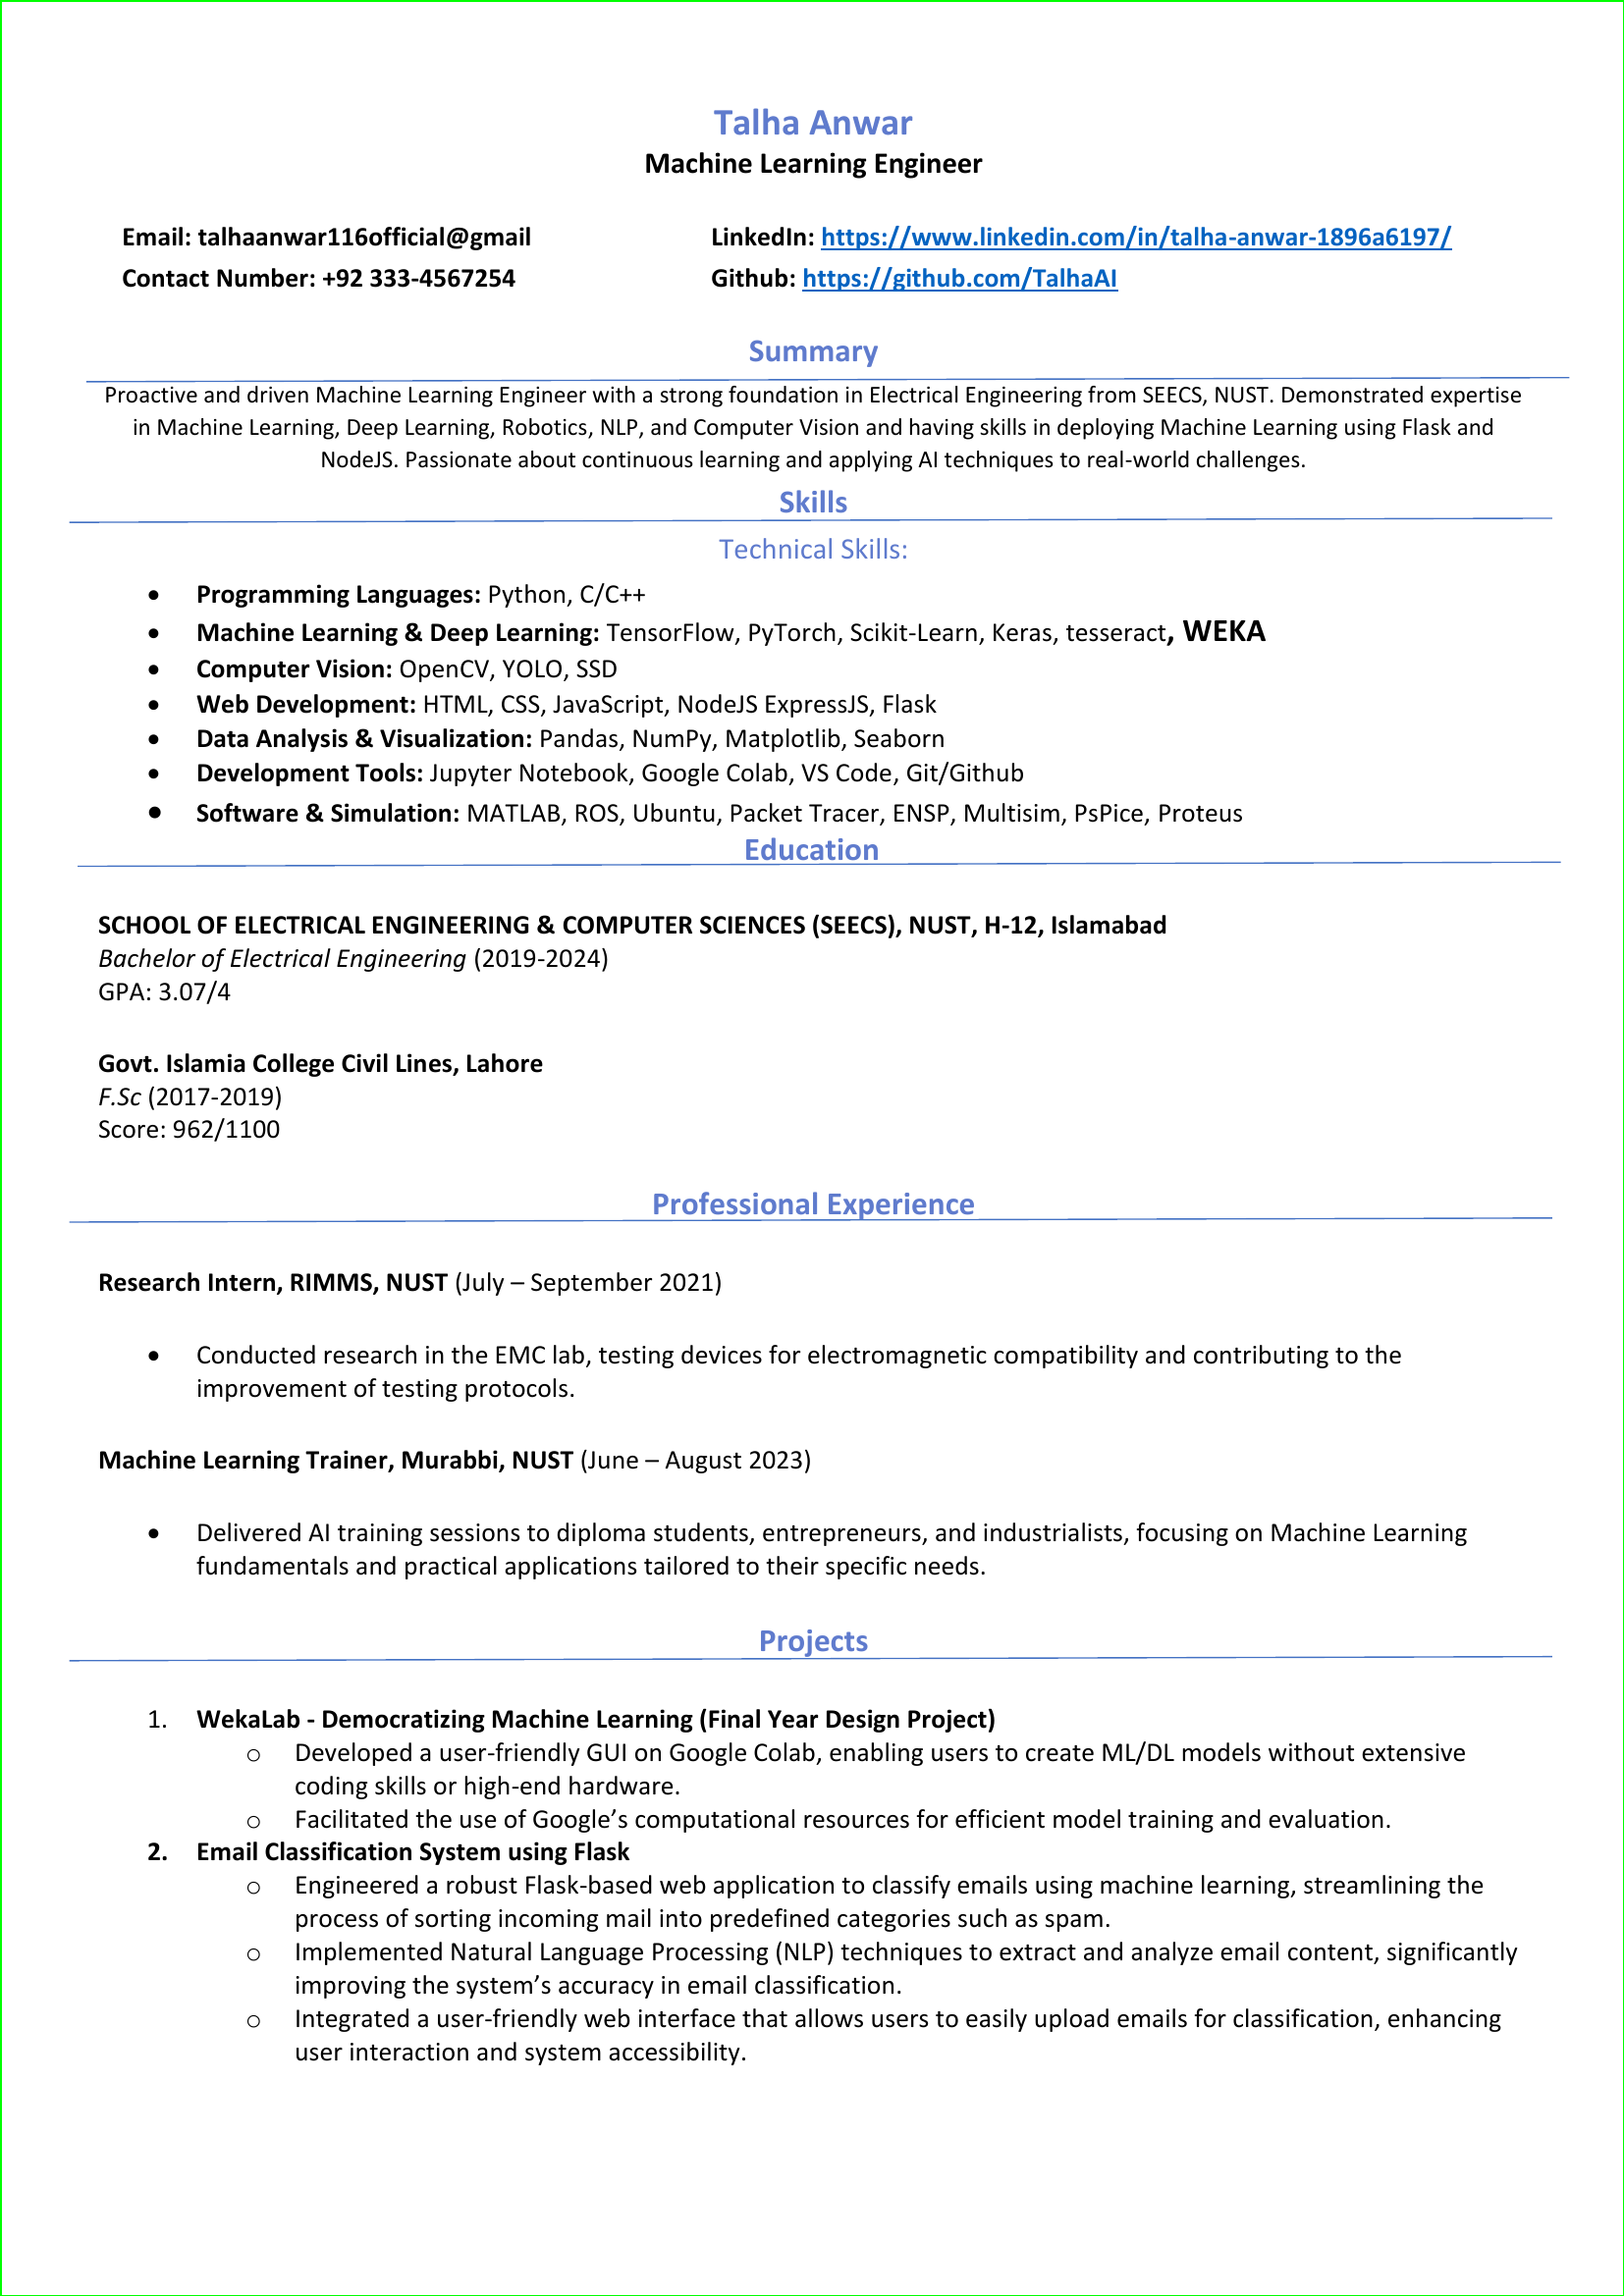

Extracted text from Talha_Anwar_CV (1).pdf page 2:
3. OCR System for Resume Processing using Tesseract and Node.js
o Developed an Optical Character Recognition (OCR) system to process resumes in PDF format, converting them
into text for easier analysis and handling.
o Utilized Tesseract OCR with PSM 6 mode and integrated OpenCV for preprocessing tasks to enhance text
extraction accuracy.
o Implemented the backend using Node.js with Express.js, ensuring efficient handling and processing of
uploaded PDF resumes.
4. Task Manager Application Using Node.js and Express
o Developed a task management application to enhance team productivity by allowing users to create, update,
and delete tasks efficiently.
o Integrated MongoDB for robust data management, utilizing Mongoose for schema-based solution to model
application data.
o Designed a responsive user interface using HTML, CSS, and Bootstrap, ensuring compatibility across different
devices and screen sizes.
o Applied Express.js middleware fo

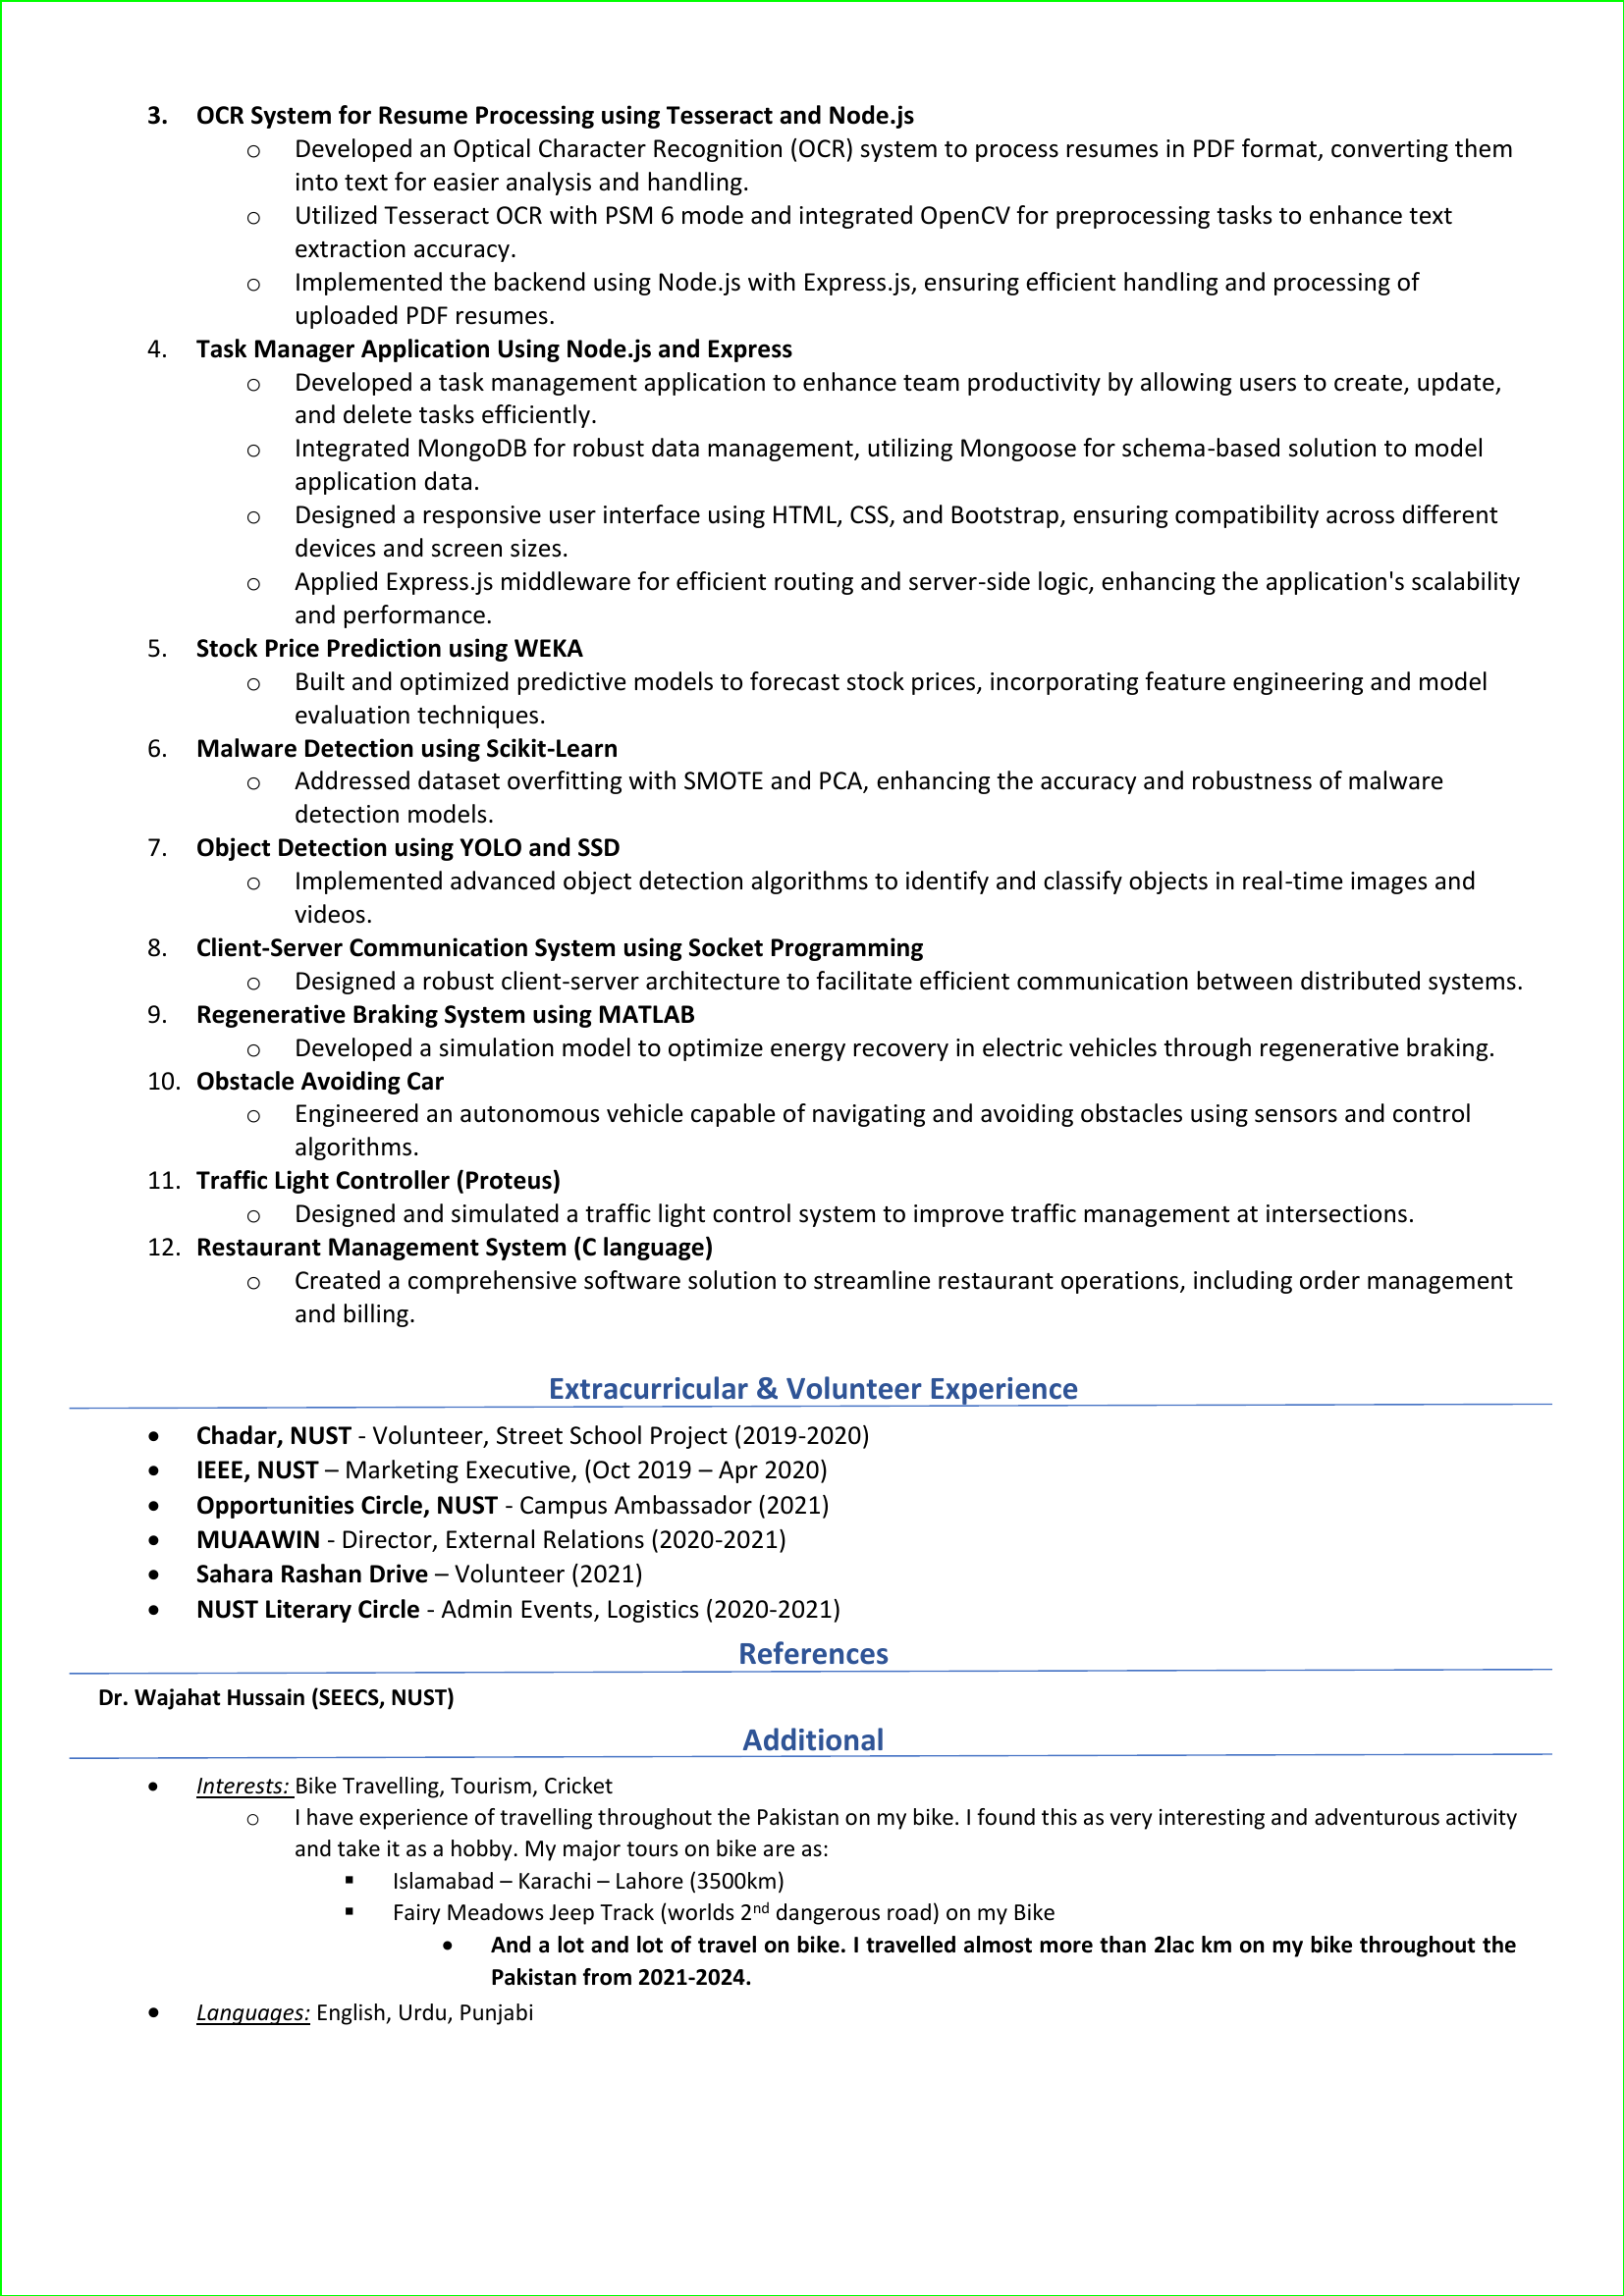

In [4]:
import pytesseract
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from pdf2image import convert_from_path

# Set up paths for Tesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Noise reduction with a bilateral filter
    filtered = cv2.bilateralFilter(gray, 9, 75, 75)
    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Morphological operations to close gaps
    kernel = np.ones((3,3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    return closing

def find_text_bounding_boxes(img):
    processed_img = preprocess_image(img)
    contours, _ = cv2.findContours(processed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    for contour in contours:
        if cv2.contourArea(contour) > 500:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img, bounding_boxes

def extract_text(img, boxes):
    text = ''
    for (x, y, w, h) in boxes:
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # Resize to improve OCR accuracy
        text += pytesseract.image_to_string(roi, config='--oem 3 --psm 6') + ' '
    return text.strip()

def ocr_from_images(image_files):
    for img_path in image_files:
        img = cv2.imread(img_path)
        annotated_img, boxes = find_text_bounding_boxes(img)
        extracted_text = extract_text(img, boxes)
        print(f"Extracted text from {img_path}:")
        print(extracted_text)
        print('-' * 50)
        cv2_imshow(annotated_img)  # Display the image with bounding boxes

def ocr_from_pdf(pdf_files):
    for pdf_path in pdf_files:
        pages = convert_from_path(pdf_path)
        for i, page in enumerate(pages):
            img = np.array(page)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert from RGB to BGR
            annotated_img, boxes = find_text_bounding_boxes(img)
            extracted_text = extract_text(img, boxes)
            print(f"Extracted text from {pdf_path} page {i + 1}:")
            print(extracted_text)
            print('-' * 50)
            cv2_imshow(annotated_img)  # Display the image with bounding boxes

def ocr(files):
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    pdf_files = [f for f in files if f.lower().endswith('.pdf')]

    if image_files:
        print(f'Processing image files: {image_files}')
        ocr_from_images(image_files)

    if pdf_files:
        print(f'Processing PDF files: {pdf_files}')
        ocr_from_pdf(pdf_files)

uploaded = files.upload()
uploaded_files = list(uploaded.keys())
ocr(uploaded_files)
